In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/14760/Desktop/cleaned_data.csv')
#导入数据集

In [3]:
features=data.drop(['Ms','Hc','Hc_log'],axis=1)
target_Ms=data['Ms']
target_Hc=data['Hc_log']
target=np.array([target_Ms,target_Hc]).T

#划分目标变量

In [4]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
#划分数据集

In [5]:
param_grid={
    'n_estimators':[50, 100, 150, 200, 250],
    'max_depth':[30, 50, 100],
    'min_samples_split': [2, 5, 7, 10]
}
rf=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_rf=grid_search.best_estimator_

In [6]:
y_pred=best_rf.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2)
print(rmse)

0.7706509167985056
17.113468213994103


In [7]:
r2=r2_score(y_test[:,0],y_pred[:,0])
rmse=np.sqrt(mean_squared_error(y_test[:,0],y_pred[:,0]))
print(r2)
print(rmse)

0.8165738338936066
24.182997220599674


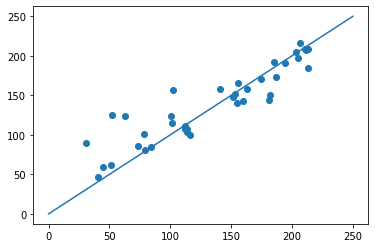

In [8]:
x=np.linspace(0,250,1000)
y=x
plt.plot(x,y)
plt.scatter(y_test[:,0],y_pred[:,0])
plt.show()

In [9]:
r2=r2_score(y_test[:,1],y_pred[:,1])
rmse=np.sqrt(mean_squared_error(y_test[:,1],y_pred[:,1]))
print(r2)
print(rmse)

0.7247279997034046
0.9613709228187636


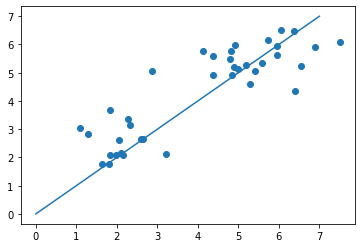

In [10]:
x=np.linspace(0,7,1000)
y=x
plt.plot(x,y)
plt.scatter(y_test[:,1],y_pred[:,1])
plt.show()